<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [2]:
#调入常用包
%matplotlib inline
import seaborn as sns
#sns.set_theme(style="whitegrid")
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\xiejie\\mypyworks\\jupyter文件'

## 计划总体控制图

In [2]:

#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'D:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(0)
sheet.name

'月_总体控制'

In [3]:
def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan
yuefen = [str(x.value) for x in sheet.col(0)[2:14]]
gongsi_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(1)[2:14]]))
gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))
gongsi_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(3)[2:14]]))
gongsi_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(5)[2:14]]))
gongsi_2019=  list(map(FloatOrNan,[x.value for x in sheet.col(6)[2:14]]))

zhongqu_jihua = list( map(FloatOrNan,[x.value for x in sheet.col(11)[2:14]]))
zhongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(12)[2:14]]))
zhongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(14)[2:14]]))
zhongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(13)[2:14]]))

dongqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(19)[2:14]]))
dongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(20)[2:14]]))
dongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(22)[2:14]]))
dongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(21)[2:14]]))

nanqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(27)[2:14]]))
nanqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(28)[2:14]]))
nanqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(30)[2:14]]))
nanqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(29)[2:14]]))

beiqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(35)[2:14]]))
beiqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(36)[2:14]]))
beiqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(38)[2:14]]))
beiqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(37)[2:14]]))

## 公司

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

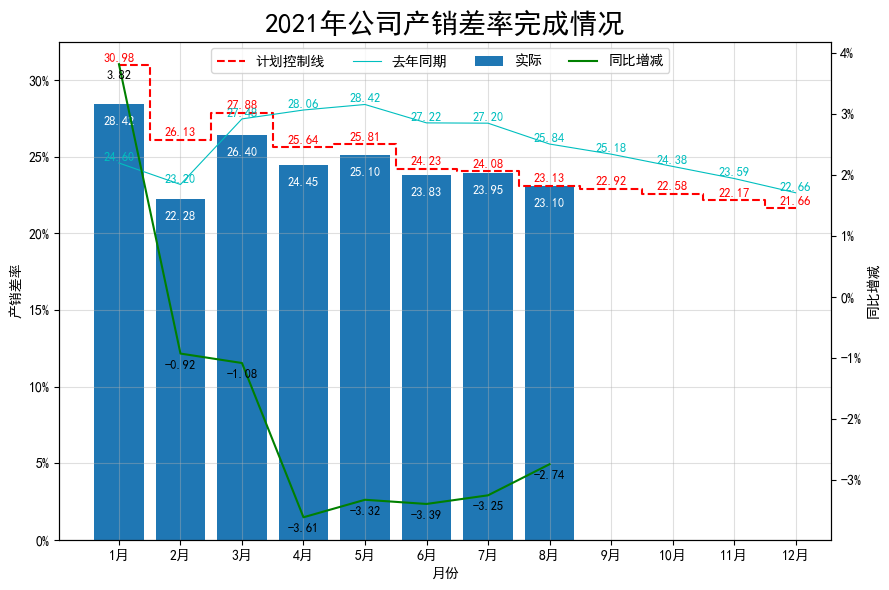

In [4]:

#ha水平对齐：right,center,left
#va垂直对齐：'top', 'bottom', 'center', 'baseline'
from matplotlib import ticker
fig,ax= plt.subplots(figsize=(9,6),dpi=100)
plt.grid(alpha=0.4)
plt.title('2021年公司产销差率完成情况',fontsize=20)
plt.step(x=yuefen, y=gongsi_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,gongsi_jihua):
 plt.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='r')

plt.bar(x=yuefen,height=gongsi_shiji,label='实际')
for x,y in zip(yuefen,gongsi_shiji):
 plt.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='w')

plt.plot(yuefen,gongsi_tongqi,label='去年同期',color='c', linewidth=0.8)
for x,y in zip(yuefen,gongsi_tongqi):
 plt.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='c')

#plt.plot(yuefen,gongsi_2019,label='2019年',color='b', linewidth=0.8)

ax.set_xlabel("月份")
ax.set_ylabel("产销差率")
ax2 = ax.twinx()

ax2.plot(yuefen, gongsi_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,gongsi_tongbi):
    plt.text(x, y-0.001, '{:.2f}'.format(y*100), ha='center', va= 'top',fontsize=9,color='black')

ax2.set_ylabel("同比增减")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.legend(loc="upper right", bbox_to_anchor=(0.8, 1), bbox_transform=ax.transAxes,ncol=5)
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\公司完成情况.svg')


## 各分公司

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12, 8),dpi=100,sharex=True)
ax1,ax2,ax3,ax4=axes.flatten()
ax1.set_title('中区')
ax1.step(x=yuefen, y=zhongqu_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,zhongqu_jihua):
 ax1.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax1.bar(x=yuefen,height=zhongqu_shiji,label='实际')
for x,y in zip(yuefen,zhongqu_shiji):
 ax1.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax1.plot(yuefen,zhongqu_tongqi,label='去年同期',color='c', linewidth=0.8)
ax1_2 = ax1.twinx()
ax1_2.plot(yuefen, zhongqu_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,zhongqu_tongbi):
 ax1_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax1_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax2.set_title('东区')
ax2.step(x=yuefen, y=dongqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,dongqu_jihua):
 ax2.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax2.bar(x=yuefen,height=dongqu_shiji)
for x,y in zip(yuefen,dongqu_shiji):
 ax2.text(x, y-0.01, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax2.plot(yuefen,dongqu_tongqi,color='c', linewidth=0.8)
ax2_2 = ax2.twinx()
ax2_2.plot(yuefen, dongqu_tongbi, color="g")
for x,y in zip(yuefen,dongqu_tongbi):
 ax2_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax3.set_title('南区')
ax3.step(x=yuefen, y=nanqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,nanqu_jihua):
 ax3.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax3.bar(x=yuefen,height=nanqu_shiji)
for x,y in zip(yuefen,nanqu_shiji):
 ax3.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax3.plot(yuefen,nanqu_tongqi,color='c', linewidth=0.8)
ax3_2 = ax3.twinx()
ax3_2.plot(yuefen, nanqu_tongbi, color="g")
for x,y in zip(yuefen,nanqu_tongbi):
 ax3_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax3_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax4.set_title('北区')
ax4.step(x=yuefen, y=beiqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,beiqu_jihua):
 ax4.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax4.bar(x=yuefen,height=beiqu_shiji)
for x,y in zip(yuefen,beiqu_shiji):
 ax4.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax4.plot(yuefen,beiqu_tongqi,color='c', linewidth=0.8)
ax4_2 = ax4.twinx()
ax4_2.plot(yuefen, beiqu_tongbi, color="g")
for x,y in zip(yuefen,beiqu_tongbi):
 ax4_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax4_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.text(0.5, 0, '月份', ha='center')
fig.text(0, 0.5, '产销差率完成情况', va='center', rotation='vertical')
fig.legend(loc="upper center",ncol=4, bbox_to_anchor=(0.5, 1.02))
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.svg')
#plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.png',dpi=500,bbox_inches ='tight')


## 公司激励区间图

In [5]:
#设置计划
#月份计划
a1=np.array([[x,y,z]  for x in ['中区','东区','南区','北区'] for y in ['计划','实际','同期']  for z in yuefen])
a2=np.array(zhongqu_jihua+zhongqu_shiji+zhongqu_tongqi+dongqu_jihua+dongqu_shiji+dongqu_tongqi+nanqu_jihua+nanqu_shiji+nanqu_tongqi+ beiqu_jihua+beiqu_shiji+beiqu_tongqi).reshape(-1,1)
data_melt = pd.concat([pd.DataFrame(a1,columns=['分公司','指标','月份']),pd.DataFrame(a2,columns=['数值'])],axis=1)

In [6]:
#修改月份
#---------------------------------------
zhonglist=[data_melt.query("月份=='8月'&指标=='实际'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='中区'").iloc[0,3]]
donglist=[data_melt.query("月份=='8月'&指标=='实际'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='东区'").iloc[0,3]]
nanlist=[data_melt.query("月份=='8月'&指标=='实际'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='南区'").iloc[0,3]]
beilist=[data_melt.query("月份=='8月'&指标=='实际'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='北区'").iloc[0,3]]

zhongcol = str(np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='计划'&分公司=='中区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='同期'&分公司=='中区'").iloc[0,3],'y','r')))
dongcol = str(np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='计划'&分公司=='东区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='同期'&分公司=='东区'").iloc[0,3],'y','r')))
nancol = str(np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='计划'&分公司=='南区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='同期'&分公司=='南区'").iloc[0,3],'y','r')))
beicol = str(np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='计划'&分公司=='北区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='8月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='8月'&指标=='同期'&分公司=='北区'").iloc[0,3],'y','r')))

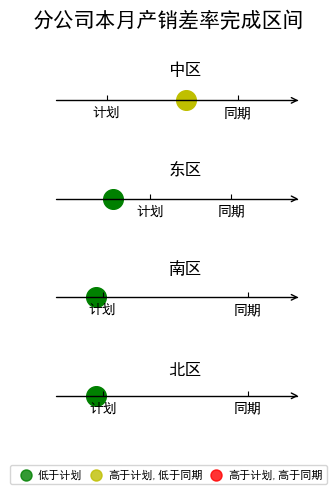

In [7]:
#修改月份
#---------------------------------------
#fig,ax= plt.subplots(figsize=(7,0.2),dpi=100)
import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(3,5),dpi=100)

ax1 = axisartist.Subplot(fig, 411) 
fig.add_axes(ax1)
ax1.axis[:].set_visible(False)
ax1.axis["x"] = ax1.new_floating_axis(0,0)
ax1.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax1.scatter(x=data_melt.query("月份=='8月'&指标=='实际'&分公司=='中区'").iloc[0,3],y=0,s=200,c=zhongcol)
ax1.set(xticks=[data_melt.query("月份=='8月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='中区'").iloc[0,3]],
      xticklabels=['计划','同期'],       
     
     xlim=[min(zhonglist)-0.01,max(zhonglist)+0.01] )
fig.text(0.5,0.85,'中区',fontsize=12)

ax2 = axisartist.Subplot(fig, 412) 
fig.add_axes(ax2)
ax2.axis[:].set_visible(False)
ax2.axis["x"] = ax2.new_floating_axis(0,0)
ax2.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax2.scatter(x=data_melt.query("月份=='8月'&指标=='实际'&分公司=='东区'").iloc[0,3],y=0,s=200,c=dongcol)
ax2.set(xticks=[data_melt.query("月份=='8月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='东区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(donglist)-0.01,max(donglist)+0.01]
        )
fig.text(0.5,0.65,'东区',fontsize=12)

ax3 = axisartist.Subplot(fig, 413) 
fig.add_axes(ax3)
ax3.axis[:].set_visible(False)
ax3.axis["x"] = ax3.new_floating_axis(0,0)
ax3.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax3.scatter(x=data_melt.query("月份=='8月'&指标=='实际'&分公司=='南区'").iloc[0,3],y=0,s=200,c=nancol)
ax3.set(xticks=[data_melt.query("月份=='8月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='南区'").iloc[0,3]],
      xticklabels=['计划','同期'],
        xlim=[min(nanlist)-0.01,max(nanlist)+0.01]
       )
fig.text(0.5,0.45,'南区',fontsize=12)

ax4 = axisartist.Subplot(fig, 414) 
fig.add_axes(ax4)
ax4.axis[:].set_visible(False)
ax4.axis["x"] = ax4.new_floating_axis(0,0)
ax4.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax4.scatter(x=data_melt.query("月份=='8月'&指标=='实际'&分公司=='北区'").iloc[0,3],y=0,s=200,c=beicol)
ax4.set(xticks=[data_melt.query("月份=='8月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='8月'&指标=='同期'&分公司=='北区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(beilist)-0.01,max(beilist)+0.01]
       )
fig.text(0.5,0.25,'北区',fontsize=12)
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=100,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.50,0.05),ncol=3,labelspacing=0.1,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':8})
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
fig.suptitle("分公司本月产销差率完成区间",fontsize=15)
#fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\分公司累计本月激励奖励区间.svg')

### 片区激励图

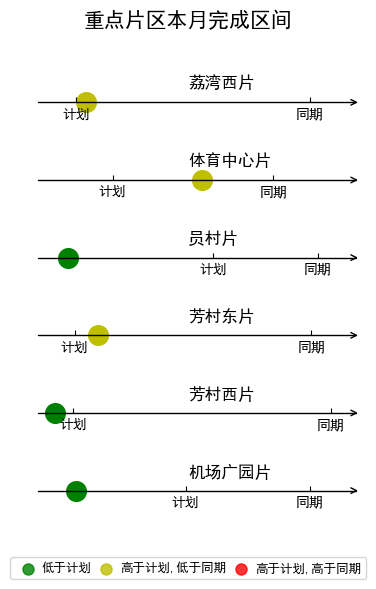

In [8]:
#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'D:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(1)

def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan

pianqu = [x.value for x in sheet.col(2)[35:41]]
shiji = [float(x.value) for x in sheet.col(7)[35:41]]
jihua = [float(x.value/100) for x in sheet.col(9)[35:41]]
tongqi = [float(x.value) for x in sheet.col(10)[35:41]]
col=[]
for i in range(6):
    col.append(str(np.where(shiji[i]<jihua[i],'g',np.where(shiji[i]<tongqi[i],'y','r'))))

#gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))


import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(4,6),dpi=100)

ax1 = axisartist.Subplot(fig, 611) 
ax2 = axisartist.Subplot(fig, 612)
ax3 = axisartist.Subplot(fig, 613)
ax4 = axisartist.Subplot(fig, 614)
ax5 = axisartist.Subplot(fig, 615)
ax6 = axisartist.Subplot(fig, 616)

axes = [ax1,ax2,ax3,ax4,ax5,ax6]

for a,i in zip(axes,range(6)):
    fig.add_axes(a)
    fig.text(0.5,0.85-0.13*i,pianqu[i],fontsize=12)
    a.axis[:].set_visible(False)
    a.axis["x"] = a.new_floating_axis(0,0)
    a.axis["x"].set_axisline_style("->", size = 1.0),    
    a.scatter(x=shiji[i],y=0,s=200,c=col[i])    
    a.set(xticks=[jihua[i],tongqi[i]],
      xticklabels=['计划','同期'],      
      xlim=[min(shiji[i],jihua[i],tongqi[i])-0.01,max(shiji[i],jihua[i],tongqi[i])+0.01])
    
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=100,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.50,0.05),ncol=3,labelspacing=0.1,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':9})

fig.suptitle("重点片区本月完成区间",fontsize=15)
plt.savefig(r'c:\Users\XieJie\Desktop\片区累计本月激励奖励区间.svg')

## 水量平衡表旭日图

In [ ]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

In [ ]:
data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]
sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [ ]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

## 对标条形图

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color='white'))#theme=ThemeType.white,
    .add_xaxis(danwei)
    .add_yaxis("计划",jihua,
               itemstyle_opts=opts.ItemStyleOpts(color='#339999'),
              label_opts=opts.LabelOpts(position='inside'))
    .add_yaxis("完成",wancheng,
               itemstyle_opts=opts.ItemStyleOpts(color='#339933'),
               label_opts=opts.LabelOpts(position='inside',color='#333333'),               
               stack="stack1")#
    .add_yaxis("同期",[-x for x in tongqi],itemstyle_opts=opts.ItemStyleOpts(color='#FF9900'),stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ ),
                                         position='left',color='#333333'
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c.render_notebook()

In [9]:
zone2 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [10]:
#替换月份
#----------------------------------------
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
"""
y = []
for idx, item in enumerate(x):
    if idx <= xlen / 2:
        y.append(
            opts.BarItem(
                name=item,
                value=(idx + 1) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#749f83"),
            )
        )
    else:
        y.append(
            opts.BarItem(
                name=item,
                value=(xlen + 1 - idx) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),
            )
        )
"""
while np.nan in gongsi_shiji:
    gongsi_shiji.remove(np.nan)

gs_mean = gongsi_shiji[-1]*100
x=list(zone2['编号'])
y=[dict(value=x,tongbi=z,itemStyle=dict(color=y)) for x,y,z in zip(zone2['综合产销差'],zone2['分公司颜色'],zone2['同比下降'])]

c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="800px",bg_color='white'))
    .add_xaxis(x)
    .add_yaxis("",y,               
              #markpoint_opts=opts.MarkPointOpts(data=[
                  #opts.MarkPointItem(name="重点片区", coord=['荔湾西片',y[x.index('荔湾西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['体育中心片',y[x.index('体育中心片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['员村片',y[x.index('员村片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村东片',y[x.index('芳村东片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村西片',y[x.index('芳村西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['机场广园片',y[x.index('机场广园片')]['value'] ], value='重'),]),
              )  
    .reversal_axis()
    .set_global_opts(title_opts=opts.TitleOpts(title="累计8月二级分区产销差排名",pos_left='center',),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    graphic_opts=[
                opts.GraphicGroup(
                    graphic_item=opts.GraphicItem(
                        # 控制整体的位置
                        left="61.8%",
                        top="80%",
                    ),
                    children=[                        
                        # opts.GraphicText控制文字的显示
                        opts.GraphicText(
                            graphic_item=opts.GraphicItem(
                                left="right",
                                top="middle",
                                z=100,
                            ),
                            graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                # 可以通过jsCode添加js代码，也可以直接用字符串
                                text="完成值",
                                font="bolder 14px Microsoft YaHei",
                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                    fill="black"
                                )
                            )
                        ),
                        opts.GraphicText(
                            graphic_item=opts.GraphicItem(
                                left="left",
                                top="middle",
                                z=100,
                            ),
                            graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                # 可以通过jsCode添加js代码，也可以直接用字符串
                                text=" 同比值",
                                font="bolder 14px Microsoft YaHei",
                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                    fill="red",                                    
                                )
                            )
                        )
                        
                    ],                    
                )
            ],)
    .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                            """function(params) {
                                             str = '{value|'+params.data.value.toFixed(2)+'} {tongbi|'+params.data.tongbi.toFixed(2)+'}';
                                            return str
                                            }
                                        """ ),                                               
                                               rich={"tongbi": {"color": "red","lineHeight": 22, "align": "center"}}, 
                                               position="right",
                                               color="black",
                                              ),
                     markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(x=20, name="产销差率")],
                         symbol = "none" ,
                             label_opts = opts.LabelOpts(formatter='{b}:{c}%',
                                                         #rich={"b": {"color": "black","lineHeight": 22, "align": "center"},                                                              
                                                          #    "c": {"color": "red", "lineHeight":22,"fontSize": 12, "align": "center"},
                                                          #   },
                                                         #padding = [-13, -20, 15, -45],
                                                         color='#800000',
                                                         position =  'end',#将警示值放在哪个位置，三个值“start”,"middle","end"  开始  中点 结束
                                                         horizontal_align = 'center',
                                                         vertical_align = 'bottom',
                                                         #rotate = 0,
                                                         #margin = -100 ,
                                                        ),
                             linestyle_opts = opts.LineStyleOpts(color='#800000',type_ = "dashed",width = 2,),
                         
            ),
                    )
)
    

c.render_notebook()

## 非重点二级片区同比变化情况

In [11]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid
from pyecharts.commons.utils import JsCode
def plot_bar(fengongsi:str):    
    zhong_x = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['编号'])
    zhong_y = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['同比下降'])
    zhong_mean = round(float(zone2[(zone2['分公司']==fengongsi) & ~np.isnan(zone2['非重点同比下降'])]['非重点同比下降']),2)
    zhong_item = []
    for x, y in zip(zhong_x,zhong_y):
        if y <= 0:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#27727B"),
                )
            )
        else:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#C1232B"),
                )
            )     
    zhongqu = (
        Bar()
        .add_xaxis(zhong_x)
        .add_yaxis("", zhong_item)
        .set_global_opts(            
            yaxis_opts=opts.AxisOpts(name="产销差率同比(%)",name_location = 'center',name_gap = 25,
                                    name_textstyle_opts=opts.TextStyleOpts(font_size=16,)),
            title_opts=opts.TitleOpts(title='',pos_left='left'),
            xaxis_opts=opts.AxisOpts(name=fengongsi,
                                     name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=15,),
                                     axislabel_opts=opts.LabelOpts(rotate=0),
                                     name_location = 'center',name_gap= 50,),   
              )
         .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                                """function(params) {
                                                 return params.data.value.toFixed(2) 
                                                }
                                            """ ),                                              
                                                  ),
                         markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(y=zhong_mean, name="合计同比")],
                             label_opts = opts.LabelOpts(formatter='{b|{b}:}{c|{c}%}',
                                                         rich={"b": {"color": "black","lineHeight": 22, "align": "center"},                                                              
                                                              "c": {"color": "red", "lineHeight":22,"fontSize": 12, "align": "center"},
                                                             },
                                                         #color='black'
                                                        ),
                             linestyle_opts = opts.LineStyleOpts(color='#800000',type_ = "dashed",width = 2,),
            ),)
           )
    return zhongqu

grid = (
    Grid(init_opts=opts.InitOpts(width="1000px", height="800px",bg_color='white'))
    .add( plot_bar('中区'), grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add(plot_bar('东区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add( plot_bar('南区'),grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="52%",pos_bottom="10%",is_show=False))
    .add( plot_bar('北区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="52%",pos_bottom="10%",is_show=False))
    )

grid.render_notebook()

In [12]:
zone4 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',
                      sheet_name=1,usecols=['分公司','编号','名称','综合产销差','当月供水量'],nrows=34)

zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))
text=[x+':'+y for x,y in zip(zone4['编号'],zone4['名称'])]


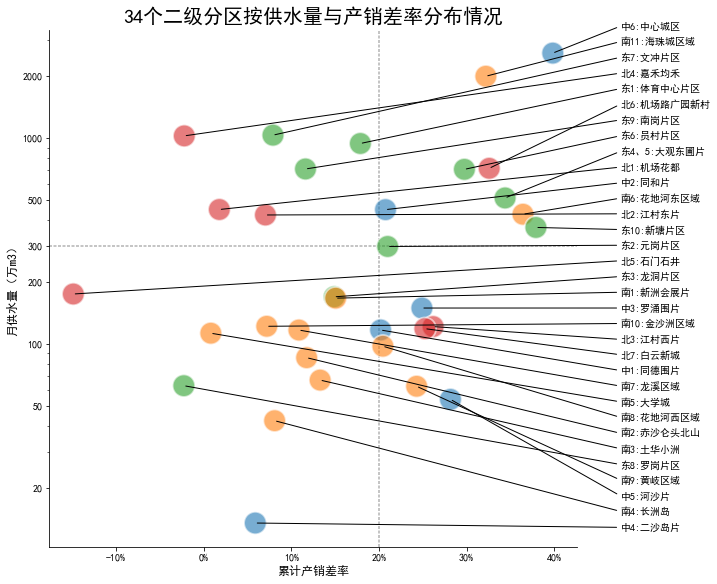

In [13]:
from matplotlib import ticker
g = sns.relplot(
    data=zone4,
    x="综合产销差", y="当月供水量",
    hue="分公司",  height=8, aspect=1,s=500,alpha=.6,legend=False
    )
g.ax.set_title("34个二级分区按供水量与产销差率分布情况",fontsize=20)
g.ax.set(yscale="log")
g.ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
g.ax.set_yticks([20,50,100,200, 300, 500,1000,2000])
g.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
g.map(plt.axhline, y=300, color=".7", dashes=(2, 1), zorder=0)
g.map(plt.axvline, x=0.20, color=".7", dashes=(2, 1), zorder=0)
g.ax.set_xlabel("累计产销差率",fontsize=12)
g.ax.set_ylabel("月供水量（万m3）",fontsize=12)

#g.ax.legend(loc='upper center',ncol=4)
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
for i in range(len(zone4)):
    g.ax.annotate(text[i], xy=xy[i], xytext=(g.ax.get_xlim()[1]+0.05,
             np.power(10,np.log10(g.ax.get_ylim()[1])-(np.log10(g.ax.get_ylim()[1])-np.log10(g.ax.get_ylim()[0]))/len(zone4)*i)   
                                            ),
            xycoords='data',
            arrowprops=dict( arrowstyle = "-",relpos=(0,0.5))
            )

g.savefig(r'c:\Users\XieJie\Desktop\34个二级分区分布.svg')

In [7]:
zone4 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',
                      sheet_name=1,usecols=['分公司','编号','名称','综合产销差','当月供水量','夜间最小流','最小流同比'],nrows=34)

zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))

def FloatOr0(value):
    if value == 0:
        return '--'
    else:
        return value

def setcol(value):
    if value > 0:
        return '上升'
    else:
        if value < 0:
            return '下降'
        else:
            return '缺数'

# text=[x+y+'最小流:'+str(z1)+' m3/时；'+'同比'+str(z)+'%' for x,y,z,z1 in zip(zone4['编号'],zone4['名称'],map(FloatOr0,round(zone4['最小流同比']*100,2)),
#                                             map(FloatOr0,zone4['夜间最小流'].astype(int)) )]        
text=[x+' '+y+':'+str(z)+'%' for x,y,z in zip(zone4['编号'],zone4['名称'],map(FloatOr0,round(zone4['最小流同比']*100,2)) )] 
zone4['最小流绝对值']= zone4['最小流同比'].abs()
zone4['最小流颜色']= list(map(setcol,zone4['最小流同比']))

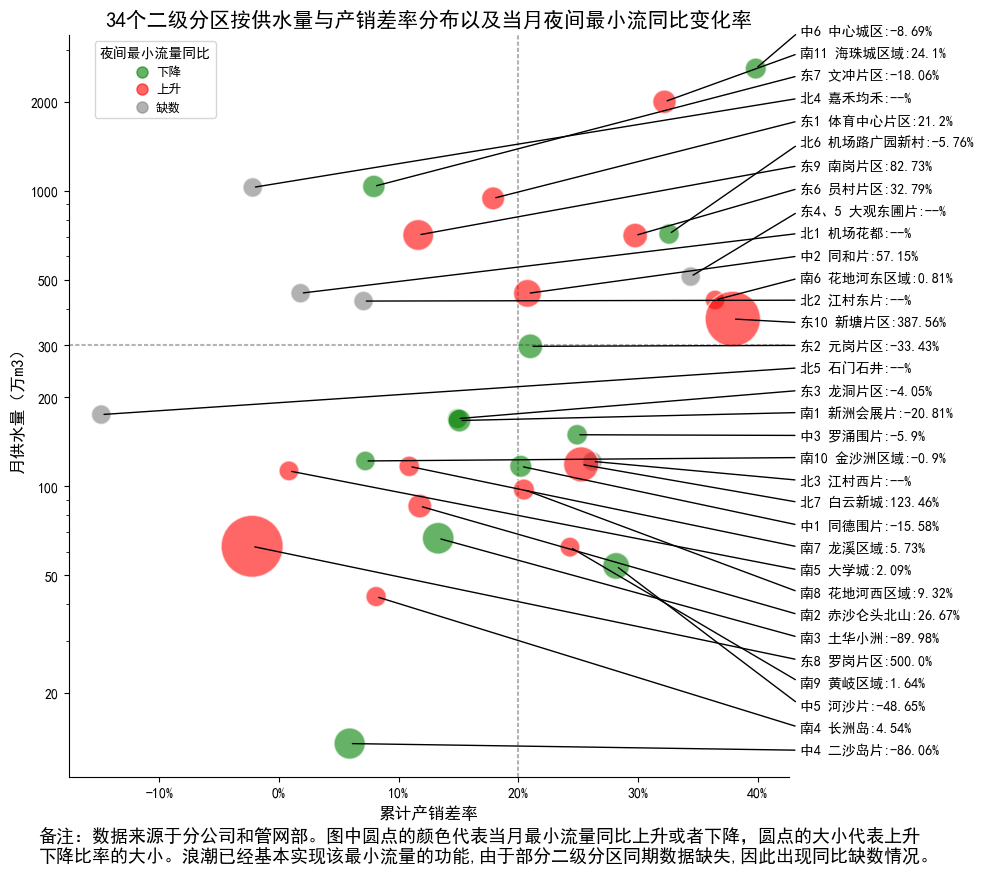

In [8]:
#更换月份
#------------------------------------
from matplotlib import ticker
f, ax = plt.subplots(figsize=(10,9),dpi=100)
sns.scatterplot(
    data=zone4,
    hue = '最小流颜色',palette=[ "g",'r',"grey"], hue_order = ["下降", "上升","缺数"],x="综合产销差", y="当月供水量",
    size="最小流绝对值", sizes=(200, 2000),alpha=.6,legend=False,ax=ax
    )
f.subplots_adjust(left=0.08, bottom=0.125, right=0.8, top=0.95)
#ax.set_position=(0.08, 0.125, 0.8, 0.95)
ax.set_title("34个二级分区按供水量与产销差率分布以及当月夜间最小流同比变化率",fontsize=15)
ax.set(yscale="log")
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.set_yticks([20,50,100,200, 300, 500,1000,2000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(y=300, color=".7", dashes=(2, 1), zorder=0)
ax.axvline(x=0.20, color=".7", dashes=(2, 1), zorder=0)
ax.set_xlabel("累计产销差率",fontsize=12)
ax.set_ylabel("月供水量（万m3）",fontsize=12)

#g.ax.legend(loc='upper center',ncol=4)
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
sns.despine()
for i in range(len(zone4)):
    ax.annotate(text[i], xy=xy[i], xytext=(ax.get_xlim()[1]+0.01,
             np.power(10,np.log10(ax.get_ylim()[1])-(np.log10(ax.get_ylim()[1])-np.log10(ax.get_ylim()[0]))/len(zone4)*i)   
                                            ),
            xycoords='data',
            arrowprops=dict( arrowstyle = "-",relpos=(0,0.5))
            )

f.text(0.05, 0.05,"备注：数据来源于分公司和管网部。图中圆点的颜色代表当月最小流量同比上升或者下降，圆点的大小代表上升\n下降比率的大小。浪潮已经基本实现该最小流量的功能,由于部分二级分区同期数据缺失,因此出现同比缺数情况。",fontsize=13,ha='left', va='center')  
for col,explain in zip(["g",'r',"grey"],["下降", "上升","缺数"]):
    ax.scatter([], [], c=col, alpha=0.6,s=100,
                label=explain)
f.legend( title="夜间最小流量同比",loc="upper left", bbox_to_anchor=(0.1,0.95),labelspacing=0.5,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':9})    

plt.savefig(r'c:\Users\XieJie\Desktop\二级分区7月夜间最小流同比变化率.svg')

In [9]:
#分公司分布图
zone3 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=6)
zone3 = zone3[~np.isnan(zone3['累计产销差率'])]
zone3

,分公司,编号,片区名称,年份,累计产销差率
0,中区,中1,同德围片,2020年,18.51
1,中区,中2,同和片,2020年,13.40
2,中区,中3,罗涌围片,2020年,28.05
3,中区,中4,二沙岛片,2020年,21.37
4,中区,中5,河沙片,2020年,46.62
...,...,...,...,...,...
63,北区,北3,江村西片,2021年,26.19
64,北区,北4,嘉禾均禾,2021年,-2.20
65,北区,北5,石门石井,2021年,-14.86
66,北区,北6,机场路广园新村,2021年,32.59


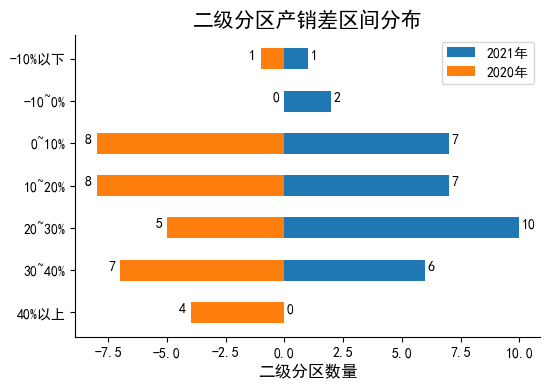

In [10]:
#f, axes = plt.subplots(2,2, figsize=(6, 4),sharex=True)
#sns.kdeplot(data=zone3 , x="累计产销差率", hue="月份",ax=axes[0,1])#类别画图函数可以分面。专项绘图函数不行。
#sns.despine(left=True) #移除边框
cxc_2020 = zone3.query("年份=='2020年'")
cxc_2020=pd.cut(cxc_2020['累计产销差率'], bins=[-np.inf,-10,0,10,20,30,40,np.inf],labels=['-10%以下','-10~0%','0~10%','10~20%','20~30%','30~40%','40%以上'])
cxc_2020=cxc_2020.value_counts(dropna=False).sort_index(ascending=False)

cxc_2021 = zone3.query("年份=='2021年'")
cxc_2021=pd.cut(cxc_2021['累计产销差率'], bins=[-np.inf,-10,0,10,20,30,40,np.inf],labels=['-10%以下','-10~0%','0~10%','10~20%','20~30%','30~40%','40%以上'])
cxc_2021=cxc_2021.value_counts(dropna=False).sort_index(ascending=False)
fig,ax= plt.subplots(figsize=(6,4),dpi=100)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False) #把右边的边框颜色设置为无色,隐藏右边框
ax.spines['top'].set_visible(False)#把上边的边框颜色设置为无色,隐藏上边框
#ax.spines['bottom'].set_visible(False)
#ax.xaxis.set_visible(False)
#ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.spines['bottom'].set_visible(False) #把上边的边框颜色设置为无色,隐藏上边框
#ax.yaxis.set_ticks_position('left') #指定左边的边为 y 轴
#ax.spines['left'].set_position(('data', 0)) 
plt.barh(cxc_2021.index,cxc_2021,height=0.5,label='2021年')
plt.barh(cxc_2020.index,-cxc_2020,height=0.5,label='2020年')

for i in cxc_2021.index:
    plt.text(cxc_2021[i]+0.1,i,cxc_2021[i])    
for i in cxc_2020.index:
    plt.text(-cxc_2020[i]-0.5,i,cxc_2020[i])
    
ax.set_title("二级分区产销差区间分布",fontsize=15)
ax.set_xlabel("二级分区数量",fontsize=12)
ax.legend(loc='best')
#handles, labels = ax.get_legend_handles_labels()
#order = [1,0]
#fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,columnspacing=6,markerscale=2,bbox_to_anchor=(0.85, 1),ncol=2,handletextpad=0.1)
plt.savefig(r'c:\Users\XieJie\Desktop\对标.svg')

In [11]:
zone5 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',header=[0,1],
                      sheet_name="月_售水分项")
zone5 = zone5.reorder_levels([1,0], axis =1)
zone5 = zone5[['月份','净追收','小户定期','大户定期','趸售水量','稽查水量','耗水量','免费水量','漏损水量','供水总量']]
zone5 = zone5.reorder_levels([1,0], axis =1)
zone5_sj = zone5['实际']
x = zone5[('月份','月份')] 

y1 = zone5_sj['净追收']
y2 = zone5_sj['小户定期']
y3 = zone5_sj['大户定期']
y4 = zone5_sj['趸售水量']
y5 = zone5_sj['稽查水量']
y6 = zone5_sj['耗水量']
y7 = zone5_sj['免费水量']
y8 = zone5_sj['供水总量']
y9 = zone5_sj['漏损水量']


zone5_tb = zone5['同比']
z1 = zone5_tb['净追收']
z2 = zone5_tb['小户定期']
z3 = zone5_tb['大户定期']
z4 = zone5_tb['趸售水量']
z5 = zone5_tb['稽查水量']
z6 = zone5_tb['耗水量']
z7 = zone5_tb['免费水量']
z8 = zone5_tb['供水总量']
z8

#labels = ["净追收","小户定期","大户定期","趸售水量","稽查水量","耗水量","免费水量","漏损水量"] 
# figure
fig,ax=plt.subplots(figsize=(12,10))

# plot
ax.stackplot(x,y1, y2, y3,y4, y5, y6,y7,y9) #堆积面积图
#增加标记
ax.plot(x,y1,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2+y3,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2+y3+y4,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2+y3+y4+y5,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2+y3+y4+y5+y6,'o-',markersize=10,alpha=0.7)
ax.plot(x,y1+y2+y3+y4+y5+y6+y7,'o-',markersize=10,alpha=0.7)
ax.plot(x,y8,'o-',markersize=10,alpha=0.7)

#设置文字注释
for i,j,k,l in zip(x, y1,y1,z1): 
    ax.text(x=i,y=j,s='净追收%.0f万,同比%+.0f万'%(k,l), va= 'top')
    
for i,j,k,l in zip(x, y1+y2,y2,z2): 
    ax.text(x=i,y=j-100,s='小户%.0f万,同比%+.0f万'%(k,l), va= 'top')
    
for i,j,k,l in zip(x, y1+y2+y3,y3,z3): 
    ax.text(x=i,y=j-100,s='大户%.0f万,同比%+.0f万'%(k,l), va= 'top')
    
for i,j,k,l in zip(x, y1+y2+y3+y4,y4,z4): 
    ax.text(x=i,y=j-300,s='趸售%.0f万,同比%+.0f万'%(k,l), va= 'top')
    
for i,j,k,l in zip(x, y1+y2+y3+y4+y5,y5,z5): 
    ax.text(x=i,y=j-100,s='稽查%.0f万,同比%+.0f万'%(k,l), va= 'center')
    
for i,j,k,l in zip(x, y1+y2+y3+y4+y5+y6,y6,z6): 
    ax.text(x=i,y=j,s='耗水%.0f万,同比%+.0f万'%(k,l), va= 'bottom')
    
for i,j,k,l in zip(x, y1+y2+y3+y4+y5+y6+y7,y7,z7): 
    ax.text(x=i,y=j,s='免费%.0f万,同比%+.0f万'%(k,l), va= 'top')
    
for i,k,l in zip(x,y8,z8): 
    ax.text(x=i,y=k,s='供水%.0f万,同比%+.0f万'%(k,l), va= 'bottom')

KeyError: "['净追收' '小户定期' '大户定期' '趸售水量' '稽查水量' '耗水量' '免费水量' '漏损水量' '供水总量'] not in index"

In [12]:
zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))
text=[x+':'+y for x,y in zip(zone4['编号'],zone4['名称'])]

In [17]:
zone3

,分公司,编号,片区名称,年份,累计产销差率
0,中区,中1,同德围片,2020年,18.51
1,中区,中2,同和片,2020年,13.40
2,中区,中3,罗涌围片,2020年,28.05
3,中区,中4,二沙岛片,2020年,21.37
4,中区,中5,河沙片,2020年,46.62
...,...,...,...,...,...
63,北区,北3,江村西片,2021年,26.19
64,北区,北4,嘉禾均禾,2021年,-2.20
65,北区,北5,石门石井,2021年,-14.86
66,北区,北6,机场路广园新村,2021年,32.59


Text(0.5, 0, '累计产销差率（%）')

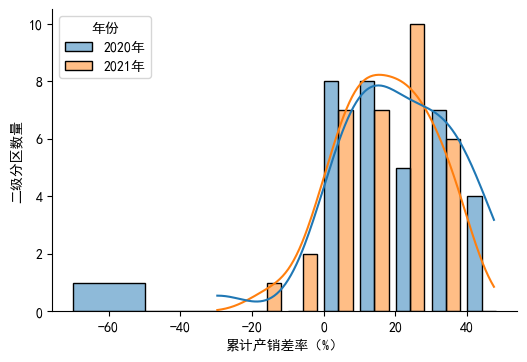

In [15]:

fig=plt.figure(figsize=(6,4),dpi=100)
#fig.suptitle("我是画布的标题",fontsize=20)
g=sns.histplot(data=zone3 , x="累计产销差率", bins=[-70,-20,-10,0,10,20,30,40,50],hue="年份",multiple='dodge',shrink=.8,kde=True)
sns.despine() #移除边框
#plt.xticks([-16,-6,4,14,24,34,44],labels=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上'])
plt.ylabel('二级分区数量')
plt.xlabel('累计产销差率（%）')
#plt.title('测试')
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",kind="kde",height=5,aspect=1.5)#必须用细项函数才可以写到axes里面,一个图不加ax索引，单行列图只加一个索引。
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.legend.set_title("")

ValueError: Could not interpret value `月份` for parameter `hue`

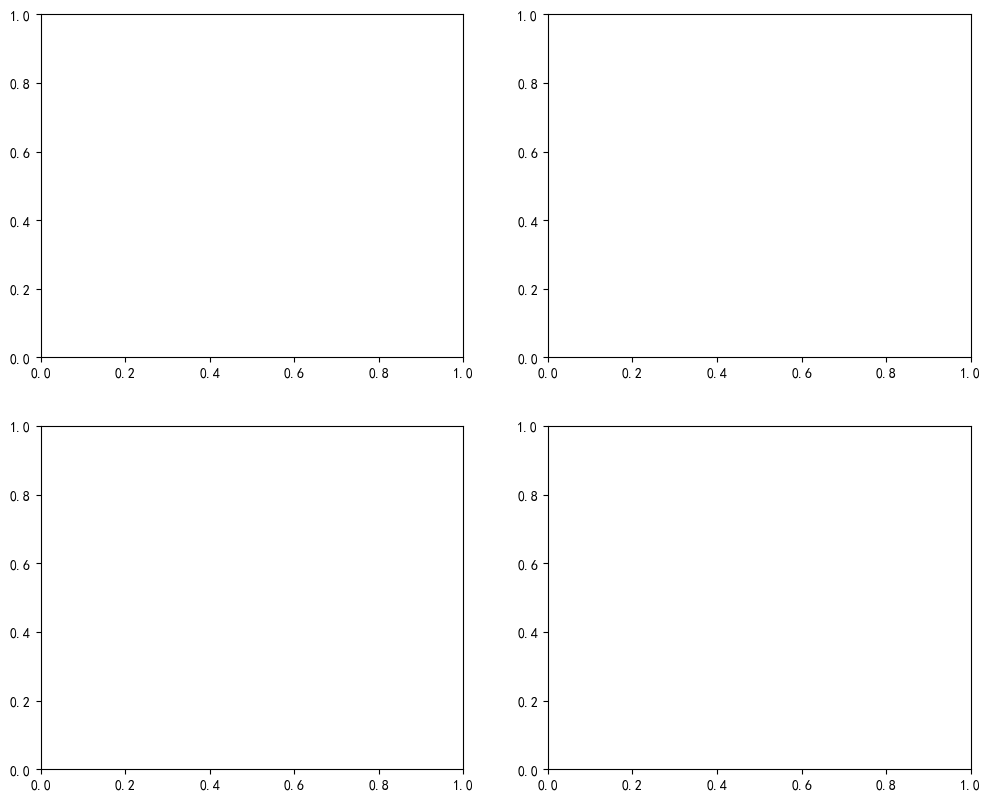

In [16]:
#g = sns.FacetGrid(zone3,col="分公司",hue="月份", height=10)
#g.map(sns.kdeplot, "累计产销差率")
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",col="分公司" ,kind="kde",col_wrap=2)
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.set(ylabel='二级分区集中度')

f, axes = plt.subplots(2,2, figsize=(12, 10),dpi=100)
ax1,ax2,ax3,ax4=axes.flatten()
bins=[-20,-10,0,10,20,30,40,50]
xticks=[-16,-6,4,14,24,34,44]
xlabel=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上']

sns.histplot(data=zone3.query("分公司 == '中区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabel)
ax1.set_xlabel('')
ax1.set_ylabel('二级分区数量')
ax1.set_title('中区')

sns.histplot(data=zone3.query("分公司 == '东区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax2)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabel)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('东区')

sns.histplot(data=zone3.query("分公司 == '南区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax3)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabel)
ax3.set_xlabel('累计产销差（%）')
ax3.set_ylabel('二级分区数量')
ax3.set_title('南区')

sns.histplot(data=zone3.query("分公司 == '北区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax4)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabel)
ax4.set_xlabel('累计产销差（%）')
ax4.set_ylabel('')
ax4.set_title('北区')

sns.despine() #移除边框
f.tight_layout()

In [ ]:
#中东南北贡献度饼图
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

recipe = ["0.17 百分点 中区",
          "1.06 百分点 东区",
          "0.21 百分点 南区",
          "1.04 百分点 北区"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
#完成售水计划比例图
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
Sys.setlocale('LC_ALL', locale = "English_United States.1252") #字符编码由GBk改成utf-8
library(ggplot2) 
library(reshape2)

data <- read.csv(file="C://Users//xiejie//mypyworks//dumbbell.csv",header = T,check.names=F)


# 注释：将原始的宽数据变成长数据，方便画图
data_melt <- melt(data,id.vars = "gene")


%%R 
order <- c("gene1","gene2","gene3","gene4","gene5","gene6","gene7","gene8","gene9","gene10")
order <- rev(order)
p <- ggplot(data_melt,aes(x=value , y= gene)) +  
  geom_line(aes(group = gene)) +
  geom_point(aes(fill=variable), shape = 21, size = 9) +
  scale_y_discrete(limits = order)
p

In [ ]:
%R -o data_melt

In [7]:
#画水务局分区总分差率柱形图
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode

names = ['测试分区'+str(i) for i in range(1,21)]
zongbiao = np.random.randint(80,500,20)
chalv = np.around(np.random.normal(0.2,0.1,20)*100,2)
fenbiao =np.around(zongbiao * (1-chalv/100),0)

test = {"names": names, 
        "zongbiao": zongbiao , 
        "chalv": chalv,
       "fenbiao":fenbiao}
test=pd.DataFrame(test)
test.sort_values('chalv',ascending=False,inplace=True)


x_data = list(test['names'])

bar = (
    Bar(init_opts=opts.InitOpts(width="1200px", height="600px",bg_color='white'))
    .add_xaxis(xaxis_data=x_data)
    .extend_axis(       
        xaxis=opts.AxisOpts(
            type_="category",
            is_show = False,
        ),
    )
    .extend_axis(       
        xaxis=opts.AxisOpts(
            type_="category",
            is_show = False,
        ),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="总分表差率(%)",
            type_="value",
            #min_=0,
            #max_=45,
            
        )
    )
    .add_yaxis(
        series_name="总表水量",
        y_axis=list(test['zongbiao']),
        gap = '-100%',
        bar_width = '50%',
        #z=0,
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#90b65c')
    )

    .add_yaxis(
        series_name="总分表差率",
        y_axis=list(test['chalv']),
        xaxis_index=1,
        yaxis_index=1,
        gap = '-100%',
        bar_width = '20%',
        #z=3,
        label_opts=opts.LabelOpts(is_show=True,
                                 formatter='{c}%'),
        itemstyle_opts=opts.ItemStyleOpts(color='#b54f4d')
    )
    .add_yaxis(
        series_name="分表水量",
        y_axis=list(test['fenbiao']),
        xaxis_index=2,
        gap = '-100%',
        bar_width = '30%', 
        #z=2,
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#538ac4')
    )
    .set_global_opts(
#         tooltip_opts=opts.TooltipOpts(
#             is_show=True, trigger="axis", axis_pointer_type="cross"
#         ),
        #datazoom_opts=opts.DataZoomOpts(),
        #title_opts=opts.TitleOpts(title="小区月总分表差率",pos_left='center',),
        toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axislabel_opts=opts.LabelOpts(rotate=90),
            boundary_gap = True,
            ),
        yaxis_opts=opts.AxisOpts(
            name="水量（万立方米）",
            type_="value",  
            #min_=0,
            max_=1000,
            #interval=200,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)

bar.render_notebook()

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid
from pyecharts.commons.utils import JsCode


def plot_bar(fengongsi:str):    
    
    zhong_x = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['编号'])
    zhong_y = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['同比下降'])
    zhong_mean = round(float(zone2[(zone2['分公司']==fengongsi) & ~np.isnan(zone2['非重点同比下降'])]['非重点同比下降']),2)
    zhong_item = []
    for x, y in zip(zhong_x,zhong_y):
        if y <= 0:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#27727B"),
                )
            )
        else:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#C1232B"),
                )
            )     
    zhongqu = (
        Bar()
        .add_xaxis(zhong_x)
        .add_yaxis("", zhong_item)
        .extend_axis(
            yaxis=opts.AxisOpts(
            name="温度",
            type_="value",
            min_=0,
            max_=25,
            interval=5,
            axislabel_opts=opts.LabelOpts(formatter="{value} °C"),
        )
    )
        .set_global_opts(            
            yaxis_opts=opts.AxisOpts(name="产销差率同比(%)",name_location = 'center',name_gap = 25,
                                    name_textstyle_opts=opts.TextStyleOpts(font_size=16,)),
            title_opts=opts.TitleOpts(title='',pos_left='left'),
            datazoom_opts=opts.DataZoomOpts(),
            xaxis_opts=opts.AxisOpts(name=fengongsi,
                                     name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=15,),
                                     axislabel_opts=opts.LabelOpts(rotate=0),
                                     name_location = 'center',name_gap= 50,),   
              )
         .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                                """function(params) {
                                                 return params.data.value.toFixed(2) 
                                                }
                                            """ ),                                              
                                                  ),
                         markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(y=zhong_mean, name="合计同比")],
                             label_opts = opts.LabelOpts(formatter='{b|{b}:}{c|{c}%}',
                                                         rich={"b": {"color": "black","lineHeight": 22, "align": "center"},                                                              
                                                              "c": {"color": "red", "lineHeight":22,"fontSize": 12, "align": "center"},
                                                             },
                                                         #color='black'
                                                        ),
                             linestyle_opts = opts.LineStyleOpts(color='#800000',type_ = "dashed",width = 2,),
            ),)
           )
    return zhongqu

grid = (
    Grid(init_opts=opts.InitOpts(width="1000px", height="800px",bg_color='white'))
    .add( plot_bar('中区'), grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add(plot_bar('东区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add( plot_bar('南区'),grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="52%",pos_bottom="10%",is_show=False))
    .add( plot_bar('北区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="52%",pos_bottom="10%",is_show=False))
    )

grid.render_notebook()

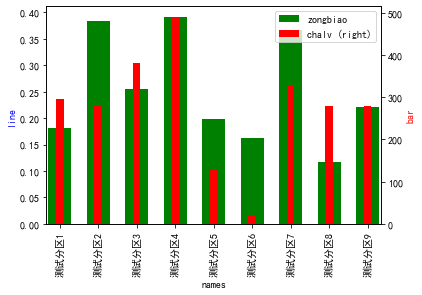

In [134]:
ax  = test.plot(x="names",y="zongbiao",color="green",kind="bar",width=0.6)
ax2 = test.plot(x="names",y="chalv", color="red",kind="bar",width=0.2, ax=ax, secondary_y=True)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.set_ylabel("bar", color="r")
ax2.set_ylabel("line", color="b")
ax.yaxis.set_label_position("right")
ax2.yaxis.set_label_position("left")

In [129]:
ax3 = test.plot(x="names",y="chalv", color="red",kind="bar",width=0.2, ax=ax2, secondary_y=True)

<AxesSubplot:xlabel='names'>

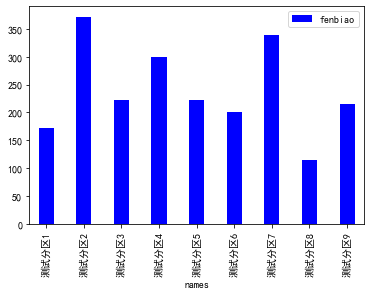

In [122]:
test.plot(x="names",y="fenbiao", color="blue",kind="bar",width=0.4)


In [83]:
test.plot(x="names",y="fenbiao", color="blue",kind="bar",width=0.4, ax=ax)

<AxesSubplot:xlabel='names'>

In [77]:
ax.yaxis.tick_right()
ax2.yaxis.tick_left()

In [78]:
test

,names,zongbiao,chalv,fenbiao
0,测试分区1,466,0.204844,370.542828
1,测试分区2,250,0.208241,197.939678
2,测试分区3,399,0.174993,329.177661
3,测试分区4,80,0.152807,67.775444
4,测试分区5,80,0.318312,54.535070
5,测试分区6,215,0.025103,209.602951
6,测试分区7,209,0.361928,133.356998
7,测试分区8,397,0.201380,317.052323
8,测试分区9,458,0.084474,419.310935


<BarContainer object of 9 artists>

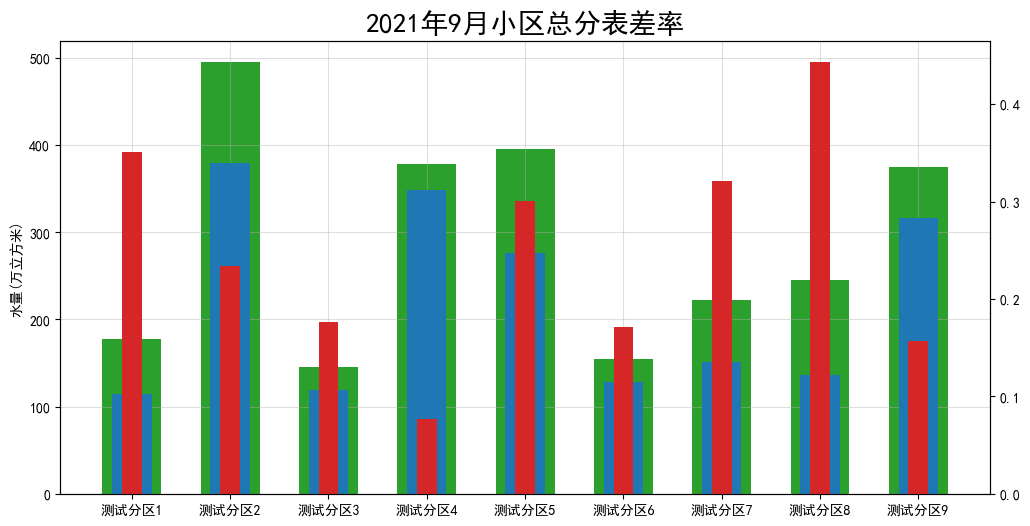

In [35]:
from matplotlib import ticker
fig,ax= plt.subplots(figsize=(12,6),dpi=100)
plt.grid(alpha=0.4)
plt.title('2021年9月小区总分表差率',fontsize=20)
names = ['测试分区'+str(i) for i in range(1,10)]
zongbiao = np.random.randint(80,500,9)
chalv = np.random.normal(0.2,0.1,9)
fenbiao =zongbiao * (1-chalv)
ax2 = ax.twinx()
ax.bar(x=names,height=zongbiao,width=0.6,color='tab:green',label='总表水量',zorder=0)
ax.set_ylabel("水量(万立方米)")


ax2.bar(x=names,height=chalv,color='tab:red',width=0.2,label='总分表差率',zorder=-100)


ax.bar(x=names,height=fenbiao,color='tab:blue',width=0.4,label='分表水量',zorder=10)

In [31]:
ax.bar(x=names,height=fenbiao,color='steelblue',width=0.4,label='分表水量',zorder=10)
ax2.set_ylabel("总分表差率")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

NameError: name 'yuefen' is not defined

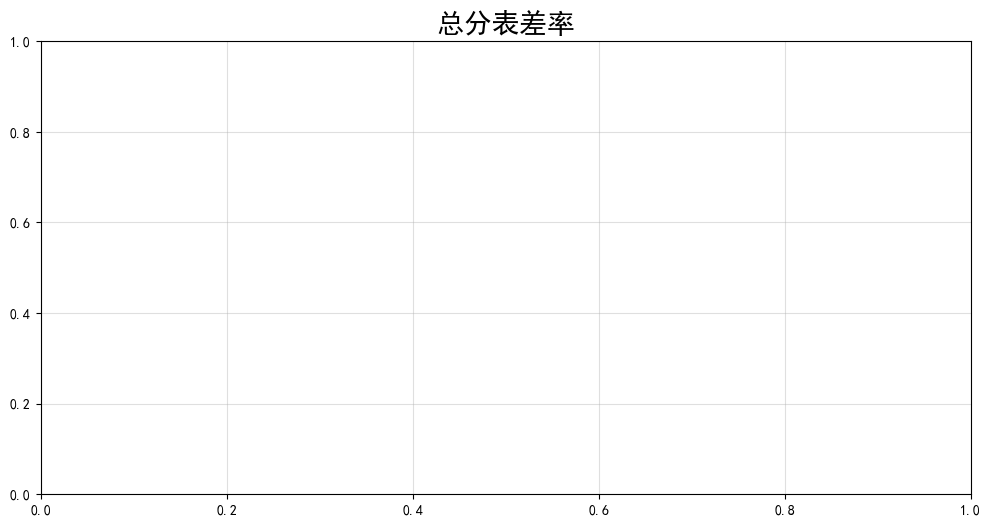

In [2]:
plt.bar(x=yuefen,height=gongsi_shiji,label='总表水量')
for x,y in zip(yuefen,gongsi_shiji):
 plt.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='w')

plt.plot(yuefen,gongsi_tongqi,label='去年同期',color='c', linewidth=0.8)
for x,y in zip(yuefen,gongsi_tongqi):
 plt.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='c')

#plt.plot(yuefen,gongsi_2019,label='2019年',color='b', linewidth=0.8)

ax.set_xlabel("月份")
ax.set_ylabel("产销差率")
ax2 = ax.twinx()

ax2.plot(yuefen, gongsi_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,gongsi_tongbi):
    plt.text(x, y-0.001, '{:.2f}'.format(y*100), ha='center', va= 'top',fontsize=9,color='black')

ax2.set_ylabel("同比增减")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.legend(loc="upper right", bbox_to_anchor=(0.8, 1), bbox_transform=ax.transAxes,ncol=5)
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\公司完成情况.svg')